# Project 2 - Ames Housing Data and Kaggle Challenge - Part 1

## Problem Statement
The goal of this project would be to predict price of houses for sale using a model developed based on the Ames Housing Data set. The main features that influence the predicted prices can be also be identified which allows housing agencies as well as propspective buyers and sellers to get an initial estimate of the price. This predicted prices would allow agents/buyers/sellers decide if they would like to proceed with an in-depth site visit by an evaluator.

## Executive Summary

The Ames Housing Dataset is a detailed and robust dataset comparing over 70 different featured relating to houses. This project aims to create a price prediction model based on the datasets provided to predict the price of houses for sale. The dataset will require thorough cleaning, exploration and engineering to be made suitable for model fitting. Linear Regression, Ridge, Lasso and Elastic Net modeling will be attempted to select a best performing model that can then be used to predict the price of houses. Performance of the final model will be benchmarked against other models on Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set()

## Data Import, Initial Check

In [3]:
ames_train = pd.read_csv('datasets/train.csv') #import train data

In [4]:
ames_test = pd.read_csv('datasets/test.csv') #import test data

In [5]:
ames_train.shape #check shape of train data

(2051, 81)

In [6]:
ames_test.shape #check shape of test data

(879, 80)

In [7]:
ames_train.columns #check headers of train data

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
ames_test.columns #check headers of test data

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

<span style="color:blue">Note: Train data has SalePrice but not Test data, as expected</span>

In [9]:
ames_train.info() #check for nulls and data types for train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

<span style="color:blue">Note: Null values for Lot Frontage, Alley, Mas Vnr Type, Mas Vnr Area, Bsmt related features, Fireplace Qu, Garage related features, Pool QC, Fence, Misc Feature.</span>

In [10]:
ames_train['PID'].head(10)

0    533352170
1    531379050
2    535304180
3    916386060
4    906425045
5    535126040
6    908186070
7    535154050
8    535353130
9    535426130
Name: PID, dtype: int64

<span style="color:blue">Note: PID or Parcel ID: https://www.storycountyiowa.gov/Faq.aspx?QID=169.<br>
A parcel number is a unique 10-digit number assigned by Story County (Ames parcel numbers are assigned by the Ames assessor following the same numbering convention) to each tax parcel. It may also be referred to as a geo or map reference number or parcel ID number (PIN)</span>

In [11]:
ames_train['MS SubClass'].value_counts()

20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64

<span style="color:blue">Note: Classification of MS Subclass type. To convert to nominal</span>

In [12]:
ames_train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [13]:
1-(ames_train['Alley'].isnull().sum()/2051)

0.06825938566552903

<span style="color:blue">Note: Classification of Street type. Only 6.8% of houses have alley access. Assume nan to be no alley access. Matches with Data Dictionary</span>

In [14]:
ames_train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

<span style="color:blue">Note: Classification of Mas Vnr type. Matches with Data Dictionary<br>
CBlock type that appears in Data Dictionary is not present in df.<br>22 null values</span>

In [15]:
ames_train[['Mas Vnr Area']].describe()

,Mas Vnr Area
count,2029.000000
mean,99.695909
std,174.963129
min,0.000000
25%,0.000000
50%,0.000000
75%,161.000000
max,1600.000000


In [16]:
ames_train[['Mas Vnr Type','Mas Vnr Area']].loc[(ames_train['Mas Vnr Type']=='None')&(ames_train['Mas Vnr Area']==0)]

,Mas Vnr Type,Mas Vnr Area
2,None,0.0
3,None,0.0
4,None,0.0
5,None,0.0
8,None,0.0
...,...,...
2046,None,0.0
2047,None,0.0
2048,None,0.0
2049,None,0.0


In [17]:
ames_train[['Mas Vnr Type','Mas Vnr Area']].loc[(ames_train['Mas Vnr Type']=='None')&(ames_train['Mas Vnr Area']!=0)]

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
810,None,288.0
1148,None,1.0
1684,None,1.0
1832,None,344.0


In [18]:
ames_train[['Mas Vnr Type','Mas Vnr Area']].loc[(ames_train['Mas Vnr Type']!='None')&(ames_train['Mas Vnr Area']==0)]

,Mas Vnr Type,Mas Vnr Area
669,BrkFace,0.0
1136,BrkFace,0.0
1187,Stone,0.0


In [19]:
len(ames_train.loc[(ames_train['Mas Vnr Type'].isnull())&(ames_train['Mas Vnr Area'].isnull())])

22

<span style="color:blue">Note: Significant portion of houses with no Masonry Veneer.<br>5 rows where there was a value for area but not type and 3 rows where type was indicated but area is 0<br>22 null values match index for both features</span>

In [20]:
ames_train['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

<span style="color:blue">Note: Classification of Bsmt Qual.<br>Ordinal<br>
Taking null values to be houses with no basement, matches with Data Dictionary</span>

In [21]:
ames_train['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [22]:
len(ames_train.loc[(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

55

<span style="color:blue">Note: Classification of Bsmt Cond.<br>Ordinal. Mostly TA<br>55 null values match for both features<br>
Taking null values to be houses with no basement, matches with Data Dictionary</span>

In [23]:
ames_train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [24]:
len(ames_train.loc[(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())&(ames_train['Bsmt Exposure'].isnull())])

55

In [25]:
ames_train[['Bsmt Qual','Bsmt Cond','Bsmt Exposure']].loc[(ames_train['Bsmt Qual'].notnull())&(ames_train['Bsmt Cond'].notnull())&(ames_train['Bsmt Exposure'].isnull())]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure
1456,Gd,TA,NaN
1547,Gd,TA,NaN
1997,Gd,TA,NaN


<span style="color:blue">Note: Classification of Bsmt Exposure.<br>Ordinal<br>
55 null values match those of quality and condition<br>
3 additional null rows where basement exists but exposure is unknown<br>
Matches with Data Dictionary</span>

In [26]:
ames_train['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [27]:
len(ames_train.loc[(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())&(ames_train['BsmtFin Type 1'].isnull())])

55

<span style="color:blue">Note: Classification of BsmtFin Type 1.<br>Ordinal<br>
55 null values match those of quality and condition<br>
Matches with Data Dictionary</span>

In [28]:
ames_train['BsmtFin SF 1'].describe()

count    2050.000000
mean      442.300488
std       461.204124
min         0.000000
25%         0.000000
50%       368.000000
75%       733.750000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64

In [29]:
len(ames_train.loc[(ames_train['BsmtFin SF 1']==0)])

657

In [30]:
len(ames_train.loc[(ames_train['BsmtFin SF 1']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

54

In [31]:
ames_train[['Bsmt Qual', 'Bsmt Cond','BsmtFin SF 1']].loc[(ames_train['BsmtFin SF 1']!=0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())]

,Bsmt Qual,Bsmt Cond,BsmtFin SF 1
1327,NaN,NaN,NaN


<span style="color:blue">Note: Classification of BsmtFin SF 1.<br>
55 null values from quality and condition correspond to 0 values or the single null value under this feature<br>
An additional 602 zero values observed</span>

In [32]:
ames_train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [33]:
len(ames_train.loc[(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())&(ames_train['BsmtFin Type 2'].isnull())])

55

In [34]:
ames_train[['Bsmt Qual', 'Bsmt Cond','BsmtFin Type 2']].loc[(ames_train['Bsmt Qual'].notnull())&(ames_train['Bsmt Cond'].notnull())&(ames_train['BsmtFin Type 2'].isnull())]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 2
1147,Gd,TA,NaN


<span style="color:blue">Note: Classification of BsmtFin Type 2.<br>Ordinal. Mostly Unf<br>
55 null values match those of quality and condition<br>
One additional null value.<br>
Matches with Data Dictionary</span>

In [35]:
ames_train['BsmtFin SF 2'].describe()

count    2050.000000
mean       47.959024
std       165.000901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFin SF 2, dtype: float64

In [36]:
len(ames_train.loc[(ames_train['BsmtFin SF 2']==0)])

1803

In [37]:
len(ames_train.loc[(ames_train['BsmtFin SF 2']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

54

In [38]:
ames_train[['Bsmt Qual', 'Bsmt Cond','BsmtFin Type 2','BsmtFin SF 2']].loc[(ames_train['BsmtFin SF 2']!=0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 2,BsmtFin SF 2
1327,NaN,NaN,NaN,NaN


<span style="color:blue">Note: Classification of BsmtFin SF 2.<br>
55 null values from quality and condition correspond to 0 values or the single null value under this feature<br>
An additional 1748 zero values observed</span>

In [39]:
ames_train['Bsmt Unf SF'].describe()

count    2050.000000
mean      567.728293
std       444.954786
min         0.000000
25%       220.000000
50%       474.500000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64

In [40]:
len(ames_train.loc[(ames_train['Bsmt Unf SF']==0)])

165

In [41]:
ames_train[['Bsmt Qual', 'Bsmt Cond']].loc[(ames_train['Bsmt Unf SF'].isnull())]

,Bsmt Qual,Bsmt Cond
1327,NaN,NaN


In [42]:
len(ames_train.loc[(ames_train['Bsmt Unf SF']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

54

<span style="color:blue">Note: Classification of Bsmt Unf SF.<br>
55 null values from quality and condition correspond to 0 values or the single null value under this feature<br>
An additional 110 zero values observed</span>

In [43]:
ames_train['Total Bsmt SF'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

In [44]:
len(ames_train.loc[(ames_train['Total Bsmt SF']==0)])

54

In [45]:
ames_train[['Bsmt Qual', 'Bsmt Cond']].loc[(ames_train['Total Bsmt SF'].isnull())]

,Bsmt Qual,Bsmt Cond
1327,NaN,NaN


In [46]:
len(ames_train.loc[(ames_train['Total Bsmt SF']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

54

<span style="color:blue">Note: Classification of Total Bsmt SF.<br>
Moderate Correlation<br>
55 null values from quality and condition correspond to 0 values or the single null value under this feature<br>
No additional zero values observed</span>

In [47]:
ames_train['Low Qual Fin SF'].describe()

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64

In [48]:
len(ames_train.loc[(ames_train['Low Qual Fin SF']==0)])

2018

<span style="color:blue">Note: 2018 zero values</span>

In [49]:
len(ames_train.loc[(ames_train['Bsmt Full Bath']==0)])

1200

In [50]:
len(ames_train.loc[(ames_train['Bsmt Full Bath']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

53

In [51]:
len(ames_train.loc[(ames_train['Bsmt Full Bath'].isnull())&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

2

<span style="color:blue">Note: The null values in the Bsmt Qual and Bsmt Cond match with the 2 null values as well as the zero values for Bsmt Full Bath<br>
An additional 1145 zero values were observed</span>

In [52]:
len(ames_train.loc[(ames_train['Bsmt Half Bath']==0)])

1923

In [53]:
len(ames_train.loc[(ames_train['Bsmt Half Bath']==0)&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

53

In [54]:
len(ames_train.loc[(ames_train['Bsmt Half Bath'].isnull())&(ames_train['Bsmt Qual'].isnull())&(ames_train['Bsmt Cond'].isnull())])

2

<span style="color:blue">Note: The null values in the Bsmt Qual and Bsmt Cond match with the 2 null values as well as the zero values for Bsmt Half Bath<br>
An additional 1868 zero values were observed</span>

In [55]:
ames_train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [56]:
ames_train['Garage Type'].isnull().sum()

113

<span style="color:blue">Note: Classification of Garage Type.<br>
Assuming null values to be houses with no garage, matches Data Dictionary</span>

In [57]:
ames_train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [58]:
ames_train['Garage Finish'].isnull().sum()

114

In [59]:
len(ames_train.loc[(ames_train['Garage Type'].isnull())&(ames_train['Garage Finish'].isnull())])

113

In [60]:
ames_train[['Garage Finish', 'Garage Type']].loc[(ames_train['Garage Type'].notnull())&(ames_train['Garage Finish'].isnull())]

,Garage Finish,Garage Type
1712,NaN,Detchd


<span style="color:blue">Note: Classification of Garage Finish.<br>
One additional null row as compared to Garage Type which means house may or may not have a garage.<br>
Assuming null values to be houses with no garage, matches Data Dictionary</span>

In [61]:
ames_train['Garage Cars'].describe()

count    2050.000000
mean        1.776585
std         0.764537
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64

In [62]:
len(ames_train.loc[ames_train['Garage Cars']==0])

113

In [63]:
len(ames_train.loc[(ames_train['Garage Type'].isnull())&(ames_train['Garage Cars']==0)])

113

In [64]:
ames_train[['Id','Garage Cars', 'Garage Type']].loc[(ames_train['Garage Cars'].isnull())]

,Id,Garage Cars,Garage Type
1712,2237,NaN,Detchd


<span style="color:blue">Note: Same issue for house with ID 2237(index 1712).<br>
0 values match the houses with no garage.</span>

In [65]:
ames_train['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [66]:
len(ames_train.loc[ames_train['Garage Area']==0])

113

In [67]:
len(ames_train.loc[(ames_train['Garage Type'].isnull())&(ames_train['Garage Cars']==0)])

113

In [68]:
ames_train[['Id','Garage Cars', 'Garage Type']].loc[(ames_train['Garage Cars'].isnull())]

,Id,Garage Cars,Garage Type
1712,2237,NaN,Detchd


<span style="color:blue">Note: Same issue for house with ID 2237(index 1712).<br>
0 values match the houses with no garage.</span>

In [69]:
ames_train['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [70]:
ames_train['Garage Qual'].isnull().sum()

114

In [71]:
len(ames_train.loc[(ames_train['Garage Type'].isnull())&(ames_train['Garage Yr Blt'].isnull())])

113

In [72]:
ames_train[['Garage Qual', 'Garage Type']].loc[(ames_train['Garage Type'].notnull())&(ames_train['Garage Qual'].isnull())]

,Garage Qual,Garage Type
1712,NaN,Detchd


<span style="color:blue">Note: Classification of Garage Qual.<br>
Same issue for house ID 2237(index 1712).<br>
Ordinal. Mostly TA<br>
Assuming null values to be houses with no garage, matches Data Dictionary</span>

In [73]:
ames_train['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [74]:
ames_train['Garage Cond'].isnull().sum()

114

In [75]:
len(ames_train.loc[(ames_train['Garage Cond'].isnull())&(ames_train['Garage Type'].isnull())])

113

In [76]:
ames_train[['Garage Cond', 'Garage Type']].loc[(ames_train['Garage Type'].notnull())&(ames_train['Garage Cond'].isnull())]

,Garage Cond,Garage Type
1712,NaN,Detchd


<span style="color:blue">Note: Classification of Garage Cond.<br>
Same issue for house ID 2237(index 1712).<br>
Ordinal<br>
Assuming null values to be houses with no garage, matches Data Dictionary</span>

In [77]:
ames_train['Enclosed Porch'].describe()

count    2051.000000
mean       22.571916
std        59.845110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       432.000000
Name: Enclosed Porch, dtype: float64

In [78]:
len(ames_train.loc[ames_train['Enclosed Porch']==0])

1724

<span style="color:blue">Note: 1724 zero values</span>

In [79]:
ames_train['3Ssn Porch'].describe()

count    2051.000000
mean        2.591419
std        25.229615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64

In [80]:
len(ames_train.loc[ames_train['3Ssn Porch']==0])

2025

<span style="color:blue">Note: 2025 zero values</span>

In [81]:
ames_train['Screen Porch'].describe()

count    2051.000000
mean       16.511458
std        57.374204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       490.000000
Name: Screen Porch, dtype: float64

In [82]:
len(ames_train.loc[ames_train['Screen Porch']==0])

1870

<span style="color:blue">Note: 1870 zero values.</span>

In [83]:
ames_train['Pool Area'].describe()

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

In [84]:
len(ames_train.loc[ames_train['Pool Area']==0])

2042

<span style="color:blue">Note: 2042 zero values.</span>

In [85]:
ames_train['Pool QC'].isnull().sum()

2042

In [86]:
len(ames_train.loc[(ames_train['Pool Area']==0)&(ames_train['Pool QC'].isnull())])

2042

<span style="color:blue">Note: Classification of Pool QC.<br>
Ordinal. Null values match zero values from Pool Area<br>
Assuming null values to be houses with no pool, matches Data Dictionary</span>

In [87]:
ames_train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [88]:
ames_train['Fence'].isnull().sum()

1651

<span style="color:blue">Note: Classification of Fence.<br>
Ordinal.<br>
Assuming null values to be houses with no fence, matches Data Dictionary</span>

In [89]:
ames_train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [90]:
ames_train['Misc Feature'].isnull().sum()

1986

<span style="color:blue">Note: Classification of Misc Features.<br>
Assuming null values to be houses with no Misc Features, matches Data Dictionary</span>

In [91]:
len(ames_train.loc[ames_train['Misc Val']==0])

1986

In [92]:
len(ames_train.loc[(ames_train['Misc Val']==0)&(ames_train['Misc Feature'].isnull())])

1986

<span style="color:blue">Note: 1986 zero values match with null values for Misc Features.</span>

<span style="color:blue">No available data for Sale Condition Feature mentioned in Data Dictionary</span>

## Changing to correct data type

In [93]:
ames_train['MS SubClass'] = ames_train['MS SubClass'].map(lambda row: str(row))

<span style="color:blue">Convert MS SubClass to string.</span>

## Filling Null Values and Ordinal Encoding

In [94]:
 def ordinal_encoding(ames_train):
        
    ames_train['Lot Shape'] = ames_train['Lot Shape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})

    ames_train['Utilities'] = ames_train['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})

    ames_train['Land Slope'] = ames_train['Land Slope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})

    ames_train['Exter Qual'] = ames_train['Exter Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})

    ames_train['Exter Cond'] = ames_train['Exter Cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})

    ames_train['Bsmt Qual'].fillna(value=0, inplace=True)
    ames_train['Bsmt Qual'] = ames_train['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0:0})

    ames_train['Bsmt Cond'].fillna(value=0, inplace=True)
    ames_train['Bsmt Cond'] = ames_train['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0:0})

    ames_train['Bsmt Exposure'].fillna(value=0, inplace=True)
    ames_train['Bsmt Exposure'] = ames_train['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 0:0})

    ames_train['BsmtFin Type 1'].fillna(value=0, inplace=True)
    ames_train['BsmtFin Type 1'] = ames_train['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 0:0})

    ames_train['BsmtFin Type 2'].fillna(value=0, inplace=True)
    ames_train['BsmtFin Type 2'] = ames_train['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 0:0})

    ames_train['Heating QC'] = ames_train['Heating QC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

    ames_train['Electrical'] = ames_train['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})

    ames_train['Kitchen Qual'] = ames_train['Kitchen Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

    ames_train['Functional'] = ames_train['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

    ames_train['Fireplace Qu'].fillna(value=0, inplace=True)
    ames_train['Fireplace Qu'] = ames_train['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0:0})

    ames_train['Garage Finish'].fillna(value=0, inplace=True)
    ames_train['Garage Finish'] = ames_train['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 0:0})

    ames_train['Garage Qual'].fillna(value=0, inplace=True)
    ames_train['Garage Qual'] = ames_train['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0:0})
    
    ames_train['Garage Cond'].fillna(value=0, inplace=True)
    ames_train['Garage Cond'] = ames_train['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 0:0})
    
    ames_train['Paved Drive'] = ames_train['Paved Drive'].map({'Y': 2, 'P': 1, 'N': 0})
    
    return ames_train

In [95]:
ordinal_encoding(ames_train);

<span style="color:blue">Fillna for ordinal and convert to numerical.</span>

In [96]:
ames_train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [97]:
def filling(ames_train):
    
    ames_train['Lot Frontage'].fillna(value=69.0552, inplace=True)
    
    ames_train['Mas Vnr Type'].fillna(value='None', inplace=True)
    
    ames_train['Mas Vnr Area'].fillna(value=0, inplace=True)
    
    ames_train['BsmtFin SF 1'].fillna(value=0, inplace=True)
    
    ames_train['Bsmt Unf SF'].fillna(value=0, inplace=True)
    
    ames_train['Total Bsmt SF'].fillna(value=0, inplace=True)
    
    ames_train['Bsmt Full Bath'].fillna(value=0, inplace=True)
    
    ames_train['Garage Type'].fillna(value='NA', inplace=True)
    
    ames_train['Garage Cars'].fillna(value=0, inplace=True)
    
    ames_train['Garage Area'].fillna(value=0, inplace=True)

In [98]:
filling(ames_train);

<span style="color:blue">Fillna for all other columns except Alley, Garage Yr Blt and Misc Feature.</span>

## Fixing erroneous cells and dropping outliers

In [99]:
ames_train.loc[1712, 'Garage Type'] = 'NA'

<span style="color:blue">Based on the other garage features observed in the initial checks, this house has no garage.</span>

In [100]:
ames_train.loc[765, 'Mas Vnr Area'] = 0
ames_train.loc[810, 'Mas Vnr Area'] = 0
ames_train.loc[1148, 'Mas Vnr Area'] = 0
ames_train.loc[1684, 'Mas Vnr Area'] = 0
ames_train.loc[1832, 'Mas Vnr Area'] = 0

ames_train.loc[669, 'Mas Vnr Type'] = 'None'
ames_train.loc[1136, 'Mas Vnr Type'] = 'None'
ames_train.loc[1187, 'Mas Vnr Type'] = 'None'

<span style="color:blue">Based on the observations in the initial checks, Mas Vnr Area was not zero although Mas Vnr Type was indicated as None for the first 5 rows above and Mas Vnr Type was not indicated as None though Mas Vnr Area was indicated as 0 for the last 3 rows above. The above correction was made for consistency</span>

In [101]:
ames_train[['Gr Liv Area']].loc[ames_train['Gr Liv Area']>4000]

,Gr Liv Area
960,5642
1885,5095


In [102]:
ames_train[['Lot Area']].sort_values(by='Lot Area').tail(10)

,Lot Area
1571,50271
1964,51974
1843,53107
1052,53227
823,53504
745,57200
960,63887
1854,70761
694,115149
471,159000


In [ ]:
ames_train.drop(960, axis=0, inplace=True)

ames_train.drop(1885, axis=0, inplace=True)

ames_train.reset_index(drop=True, inplace=True)

<span style="color:blue">Checked for houses larger than 4000 sqft and dropped as advised in Data Dictionary.<br>
    2-5 outliers for lot areas as well but does not match the large houses by sqft</span>

## 1st Dropping of Features based on initial checks

In [103]:
def first_drop(ames_train):
    
    ames_train.drop('Alley', axis=1, inplace=True)
    
    ames_train.drop('Misc Feature', axis=1, inplace=True)
    
    ames_train.drop('Misc Val', axis=1, inplace=True)
    
    ames_train.drop('Pool QC', axis=1, inplace=True)
    
    ames_train.drop('Pool Area', axis=1, inplace=True)
    
    ames_train.drop('PID', axis=1, inplace=True)
    
    ames_train.drop('Id', axis=1, inplace=True)
    
    ames_train.drop('Fence', axis=1, inplace=True)
    
    ames_train.drop('BsmtFin SF 2', axis=1, inplace=True)
    
    ames_train.drop('Low Qual Fin SF', axis=1, inplace=True)
    
    ames_train.drop('Bsmt Half Bath', axis=1, inplace=True)
    
    ames_train.drop('Enclosed Porch', axis=1, inplace=True)
    
    ames_train.drop('3Ssn Porch', axis=1, inplace=True)
    
    ames_train.drop('Screen Porch', axis=1, inplace=True)

In [104]:
first_drop(ames_train);

<span style="color:blue">Dropped Alley and Misc Features since both columns are of nominal type data with large number of null values. Dropped Misc Val correspondingly<br><br>Dropped Pool QC and Fence since they contain a large number of null values. Dropped Pool Area correspondingly<br><br>Dropped Screen Porch, 3Ssn Porch, Enclosed Porch, BsmtFin SF 2, Bsmt Half Bath and Low Qual Fin SF for large number of zero values.<br><br>Dropped Id and PID which are identifiers.</span>

## Using Interaction Terms to combine features

In [106]:
def interaction_terms(ames_train):
    
    ames_train['House Age']=ames_train['Yr Sold']-ames_train['Year Built']
    
    ames_train['Years since Remod/Add']=ames_train['Yr Sold']-ames_train['Year Remod/Add']
    
    ames_train['Garage Age']=ames_train['Yr Sold']-ames_train['Garage Yr Blt']
    
    ames_train.drop('Yr Sold', axis=1, inplace=True)
    
    ames_train.drop('Year Built', axis=1, inplace=True)
    
    ames_train.drop('Year Remod/Add', axis=1, inplace=True)
    
    ames_train.drop('Garage Yr Blt', axis=1, inplace=True)

In [107]:
interaction_terms(ames_train);

<span style="color:blue">Converted all Years columns to Age before dropping</span>

## EDA: Heatmap of Correlation Matrix

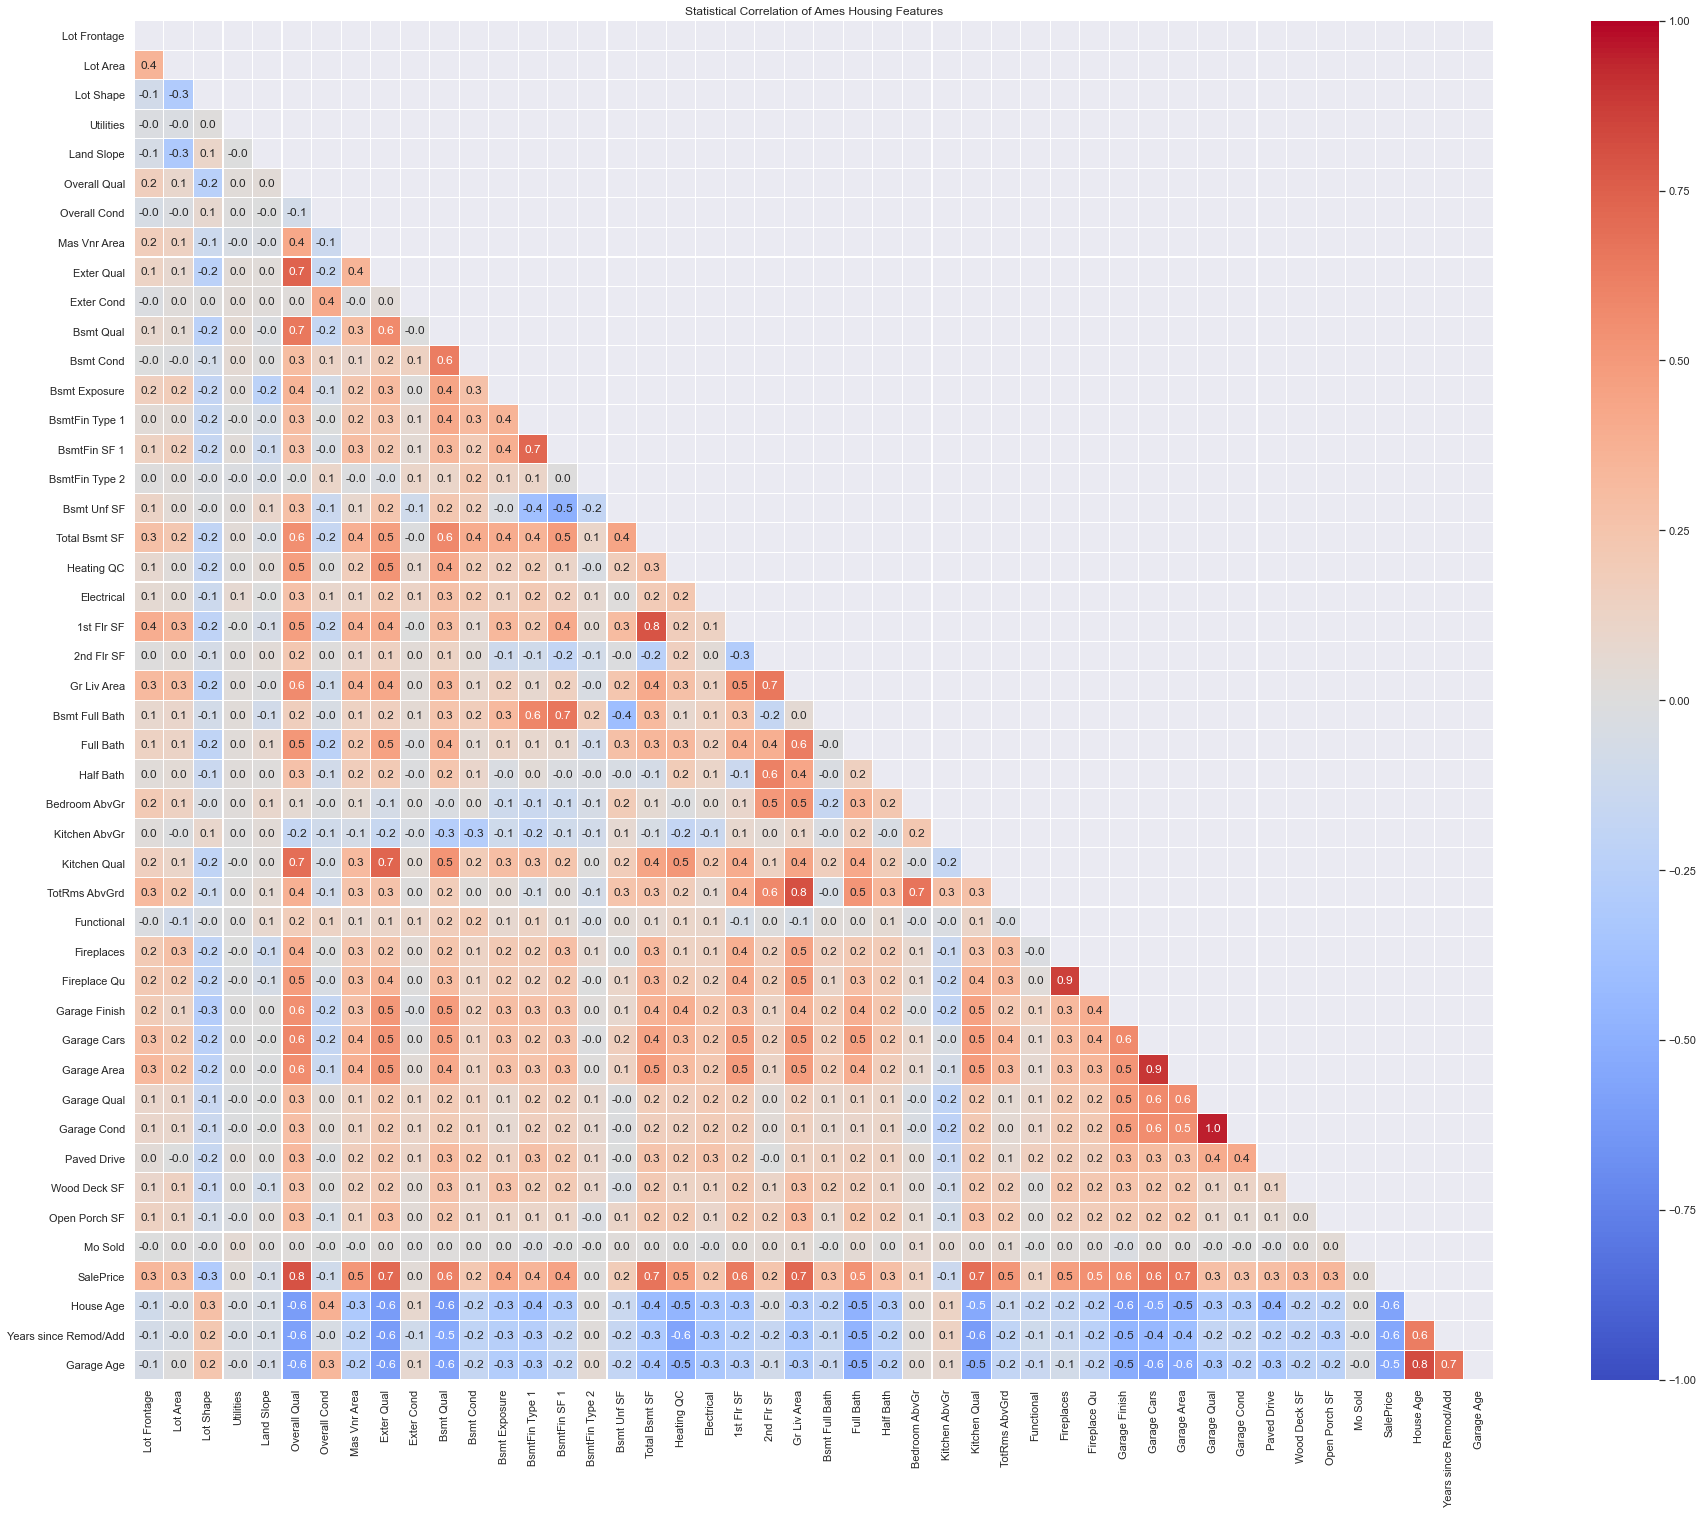

In [108]:
mask = np.triu(ames_train.corr())
plt.figure(figsize=(35,25))
ax = plt.axes()
ax.set_title("Statistical Correlation of Ames Housing Features")
sns.heatmap(ames_train.corr(), ax=ax, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True, square=True, mask=mask, linewidths=.1, fmt=".1f");

In [109]:
ames_train[['Fireplaces','SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.473783
SalePrice,0.473783,1.000000


In [110]:
ames_train[['Fireplaces','SalePrice']].corr()

,Fireplaces,SalePrice
Fireplaces,1.000000,0.473783
SalePrice,0.473783,1.000000


In [111]:
ames_train[['Garage Cond','SalePrice']].corr()

,Garage Cond,SalePrice
Garage Cond,1.000000,0.265066
SalePrice,0.265066,1.000000


In [112]:
ames_train[['Garage Qual','SalePrice']].corr()

,Garage Qual,SalePrice
Garage Qual,1.000000,0.285328
SalePrice,0.285328,1.000000


In [113]:
ames_train[['Garage Age','SalePrice']].corr()

,Garage Age,SalePrice
Garage Age,1.000000,-0.534559
SalePrice,-0.534559,1.000000


In [114]:
ames_train[['House Age','SalePrice']].corr()

,House Age,SalePrice
House Age,1.000000,-0.572441
SalePrice,-0.572441,1.000000


In [115]:
ames_train[['Years since Remod/Add','SalePrice']].corr()

,Years since Remod/Add,SalePrice
Years since Remod/Add,1.000000,-0.552226
SalePrice,-0.552226,1.000000


<span style="color:blue">Collinearity observed for:<br><br>
-Overall Qual, Kitchen Qual, Exter Qual and Bsmt Qual. To keep Overall Qual based on better corr with SalePrice and drop the rest<br><br>
-BsmtFin Type 1 and BsmtFin SF1, as well as, Bsmt Full Bath and BsmtFin SF1. To keep BsmtFin SF1 since it is the feature that is common across the two high collinearity pairs and drop the other two features<br><br>
-1st Flr SF and Total Bsmt SF. To keep Total Bsmt SF based on better corr with SalePrice and drop 1st Flr SF<br><br>
-Gr Liv Area and 2nd Flr SF, as well as, Gr Liv Area and TotRms AbvGrd. To keep Gr Liv Area based on better corr with SalePrice and drop 2nd Flr SF as well as TotRms AbvGrd<br><br>
-Bedroom AbvGr and TotRms AbvGrd. TotRms AbvGrd has been selected for dropping already<br><br>
-Fireplaces and Fireplace Qu. To keep Fireplace Qu while dropping Fireplaces based on better corr with SalePrice<br><br>
-Garage Area and Garage Cars. To keep Garage Area while dropping Garage Cars based on better corr with SalePrice<br><br>
-Garage Cond and Garage Qual. To keep Garage Qual while dropping Garage Cond based on better corr with SalePrice<br><br>
-Garage Age and House Age. To keep House Age while dropping Garage Age based on better corr with SalePrice<br><br>
-Garage Age and Years since Remod/Add. To keep Years since Remod/Add since Garage Age has been selected for dropping already</span>

## 2nd Dropping of Features based on the above findings

In [116]:
def second_drop(ames_train):
    
    ames_train.drop('Kitchen Qual', axis=1, inplace=True)
    
    ames_train.drop('Exter Qual', axis=1, inplace=True)
    
    ames_train.drop('Bsmt Qual', axis=1, inplace=True)
    
    ames_train.drop('Bsmt Full Bath', axis=1, inplace=True)
    
    ames_train.drop('BsmtFin Type 1', axis=1, inplace=True)
    
    ames_train.drop('1st Flr SF', axis=1, inplace=True)
    
    ames_train.drop('2nd Flr SF', axis=1, inplace=True)
    
    ames_train.drop('TotRms AbvGrd', axis=1, inplace=True)
    
    ames_train.drop('Fireplaces', axis=1, inplace=True)
    
    ames_train.drop('Garage Cars', axis=1, inplace=True)
    
    ames_train.drop('Garage Cond', axis=1, inplace=True)
    
    ames_train.drop('Garage Age', axis=1, inplace=True)

In [117]:
second_drop(ames_train);

## EDA: Creating Scatterplots for Numerical Features

In [118]:
scat_cols = ['Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 
             'Mas Vnr Area', 'Exter Cond', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin Type 2', 'Bsmt Unf SF',
             'Total Bsmt SF', 'Heating QC', 'Electrical', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
             'Kitchen AbvGr', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Area', 'Garage Qual', 'Paved Drive',
             'Wood Deck SF', 'Open Porch SF', 'Mo Sold', 'House Age', 'Years since Remod/Add']

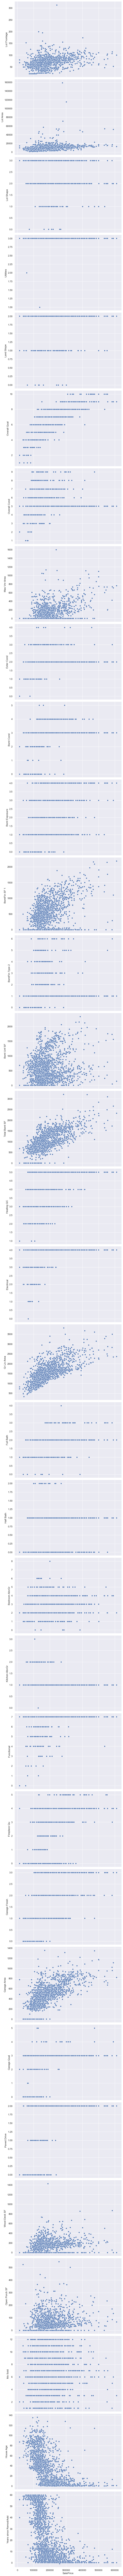

In [119]:
sns.pairplot(ames_train, y_vars=scat_cols, x_vars=['SalePrice'], height=5, aspect=1.5);

## EDA: Creating Histograms for Continuous Features

In [120]:
def subplot_hist(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(figsize=(20, 40), nrows=nrows, ncols=2)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].axhline(y=(2051*0.8))
        
        ax[i].set_title(list_of_columns[i])

In [121]:
hist_cols = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', 
             'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'House Age', 'Years since Remod/Add']

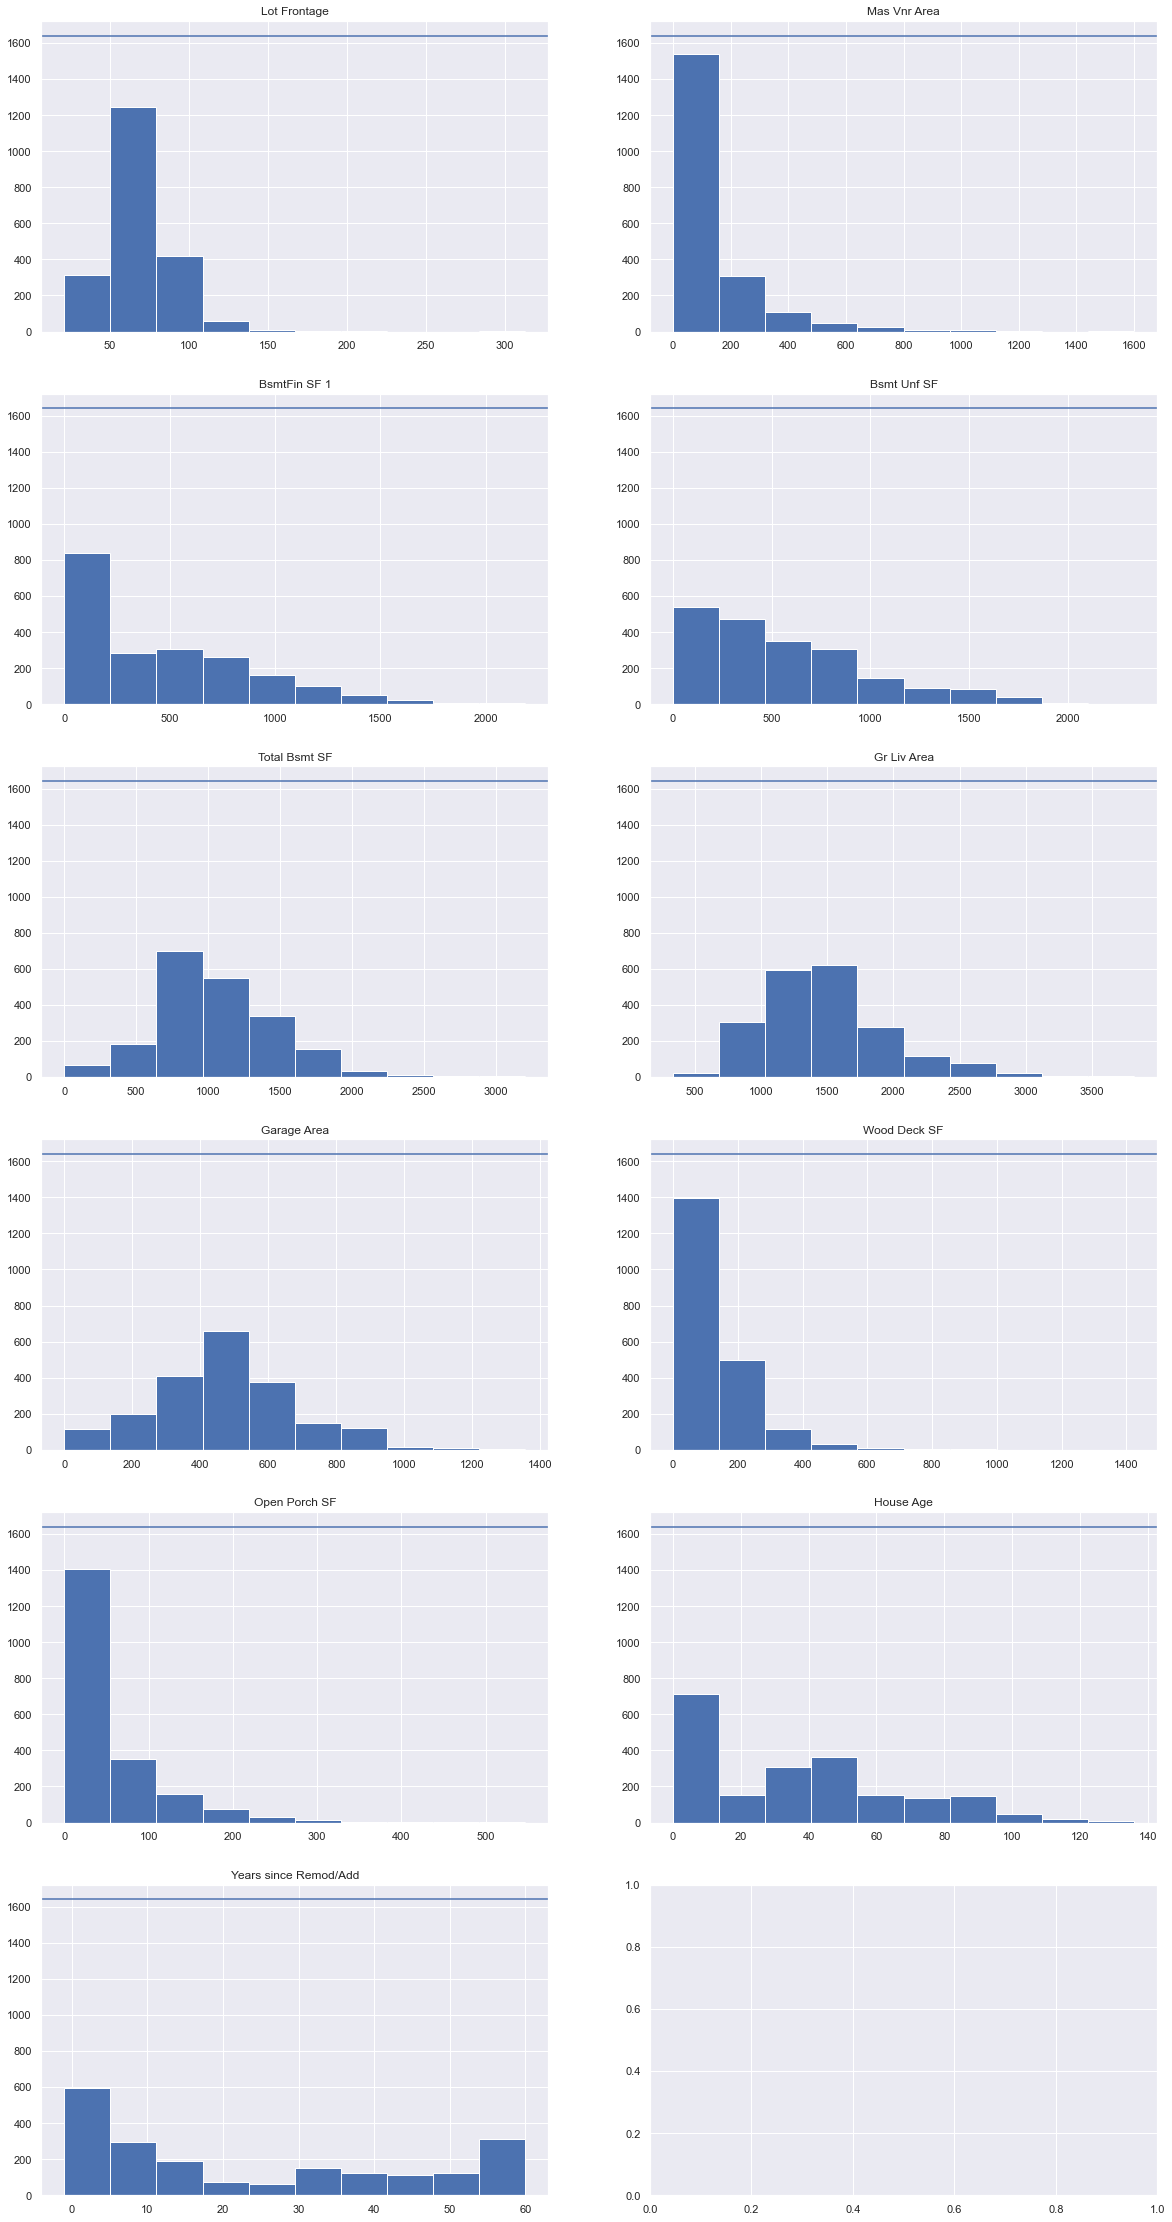

In [122]:
subplot_hist(ames_train, hist_cols)

In [123]:
ames_train['Lot Area'].loc[ames_train['Lot Area']>80000]

471    159000
694    115149
Name: Lot Area, dtype: int64

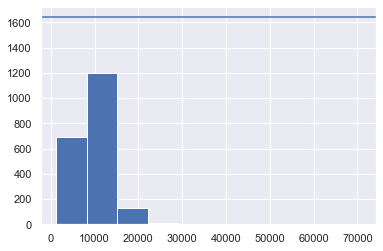

In [124]:
#plt.figure(figsize=(15,10))
plt.hist(ames_train['Lot Area'].loc[ames_train['Lot Area']<80000])
plt.axhline(y=(2051*0.8));

## EDA: Creating Bar Plots for Ordinal features

In [125]:
def subplot_bares(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(figsize=(20, 40), nrows=nrows, ncols=2)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        ax[i].bar(dataframe[column].unique(), dataframe[column].value_counts())
        ax[i].axhline(y=(2051*0.8))
        
        ax[i].set_title(list_of_columns[i])

In [126]:
ord_cols = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Cond', 'Bsmt Cond', 'Bsmt Exposure', 
            'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 
            'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Paved Drive', 'Mo Sold']

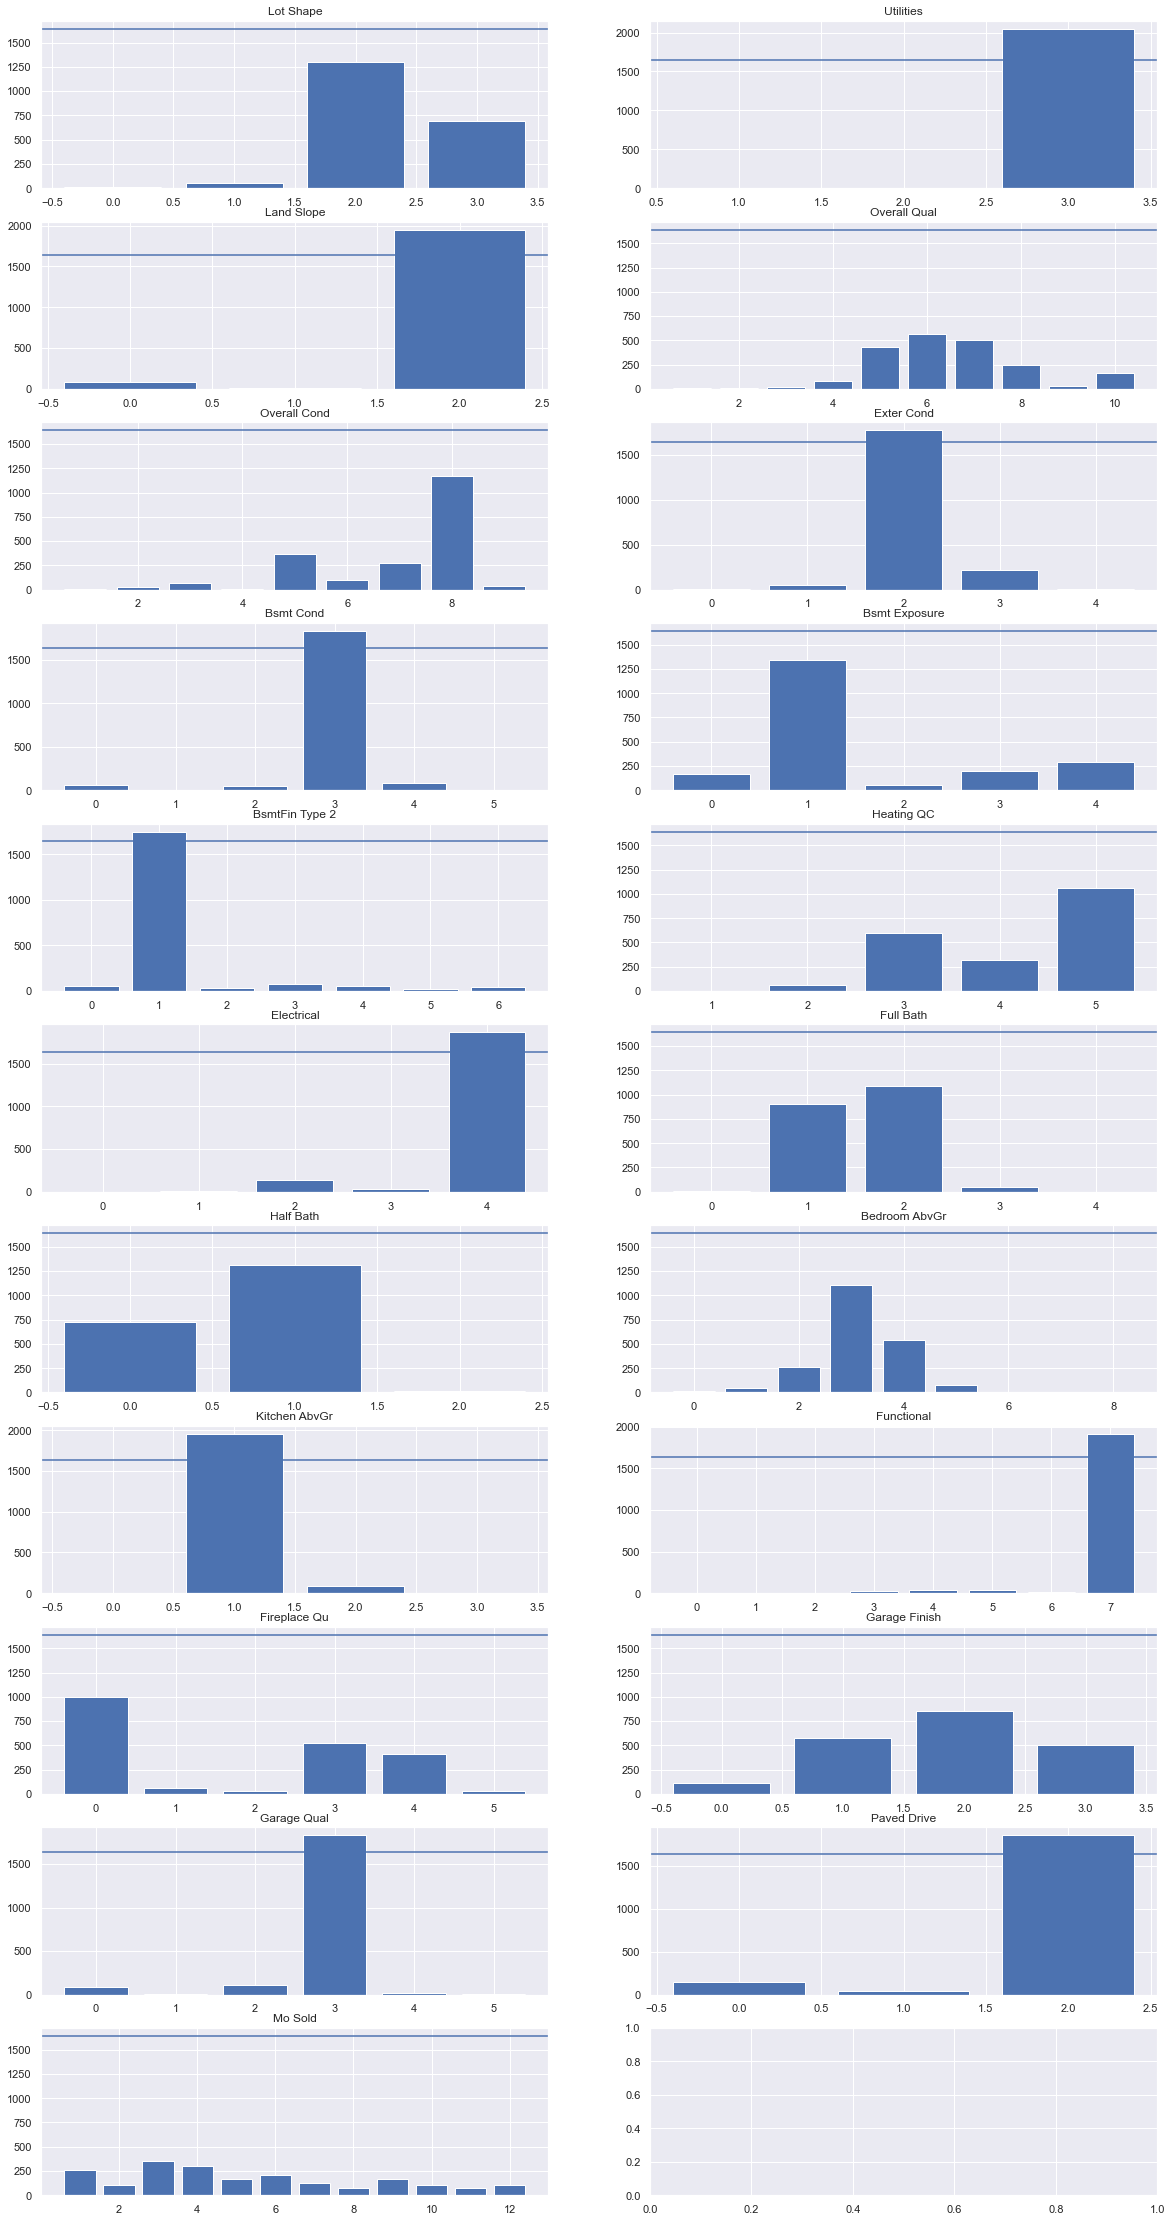

In [127]:
subplot_bares(ames_train, ord_cols)

<span style="color:blue">To drop Utilities, Land Slope, Exter Cond, Bsmt Cond, BsmtFin Type 2, Electrical, Kitchen AbvGr, Functional, Garage Qual, Paved Drive based on large number of same values shown in bar plot.<br><br>
Based on the pair plots, Overall Qual, Total Bsmt SF, Gr Liv Area and Garage Area appear to have a good linear relationship.<br>The correlation with SalePrice for these 4 features were the best in the above heatmap as well.<br><br>
From the Histograms, it is observed that Garage Area, Gr Liv Area, Total Bsmt SF, Lot Frontage have a distribution that is close to normal. Most of the other features are skewed with more values close to 0.<br>There are no bins that take up a majority of the dataset indicating a reasonable degree of variance.<br>Lot Area was plotted separately due to 2 outlier points causing an inaccurate representation of the feature.<br><br>
One negative value was observed on the Years since Remod/Add. To amend value to 0.<br><br>
Mo Sold is shown to have no correlation with SalePrice and is thus selected for dropping as well.</span>

In [128]:
ames_train['Years since Remod/Add'].loc[ames_train['Years since Remod/Add']<0]

1718   -1
Name: Years since Remod/Add, dtype: int64

In [129]:
ames_train.loc[1718,'Years since Remod/Add']=0

## 3rd Dropping of Features based on the plots for numerical features

In [130]:
def third_drop(ames_train):
    
    ames_train.drop('Utilities', axis=1, inplace=True)
    
    ames_train.drop('Land Slope', axis=1, inplace=True)
    
    ames_train.drop('Exter Cond', axis=1, inplace=True)
    
    ames_train.drop('Bsmt Cond', axis=1, inplace=True)
    
    ames_train.drop('BsmtFin Type 2', axis=1, inplace=True)
    
    ames_train.drop('Electrical', axis=1, inplace=True)
    
    ames_train.drop('Kitchen AbvGr', axis=1, inplace=True)
    
    ames_train.drop('Functional', axis=1, inplace=True)
    
    ames_train.drop('Garage Qual', axis=1, inplace=True)
    
    ames_train.drop('Paved Drive', axis=1, inplace=True)
    
    ames_train.drop('Mo Sold', axis=1, inplace=True)

In [131]:
third_drop(ames_train);

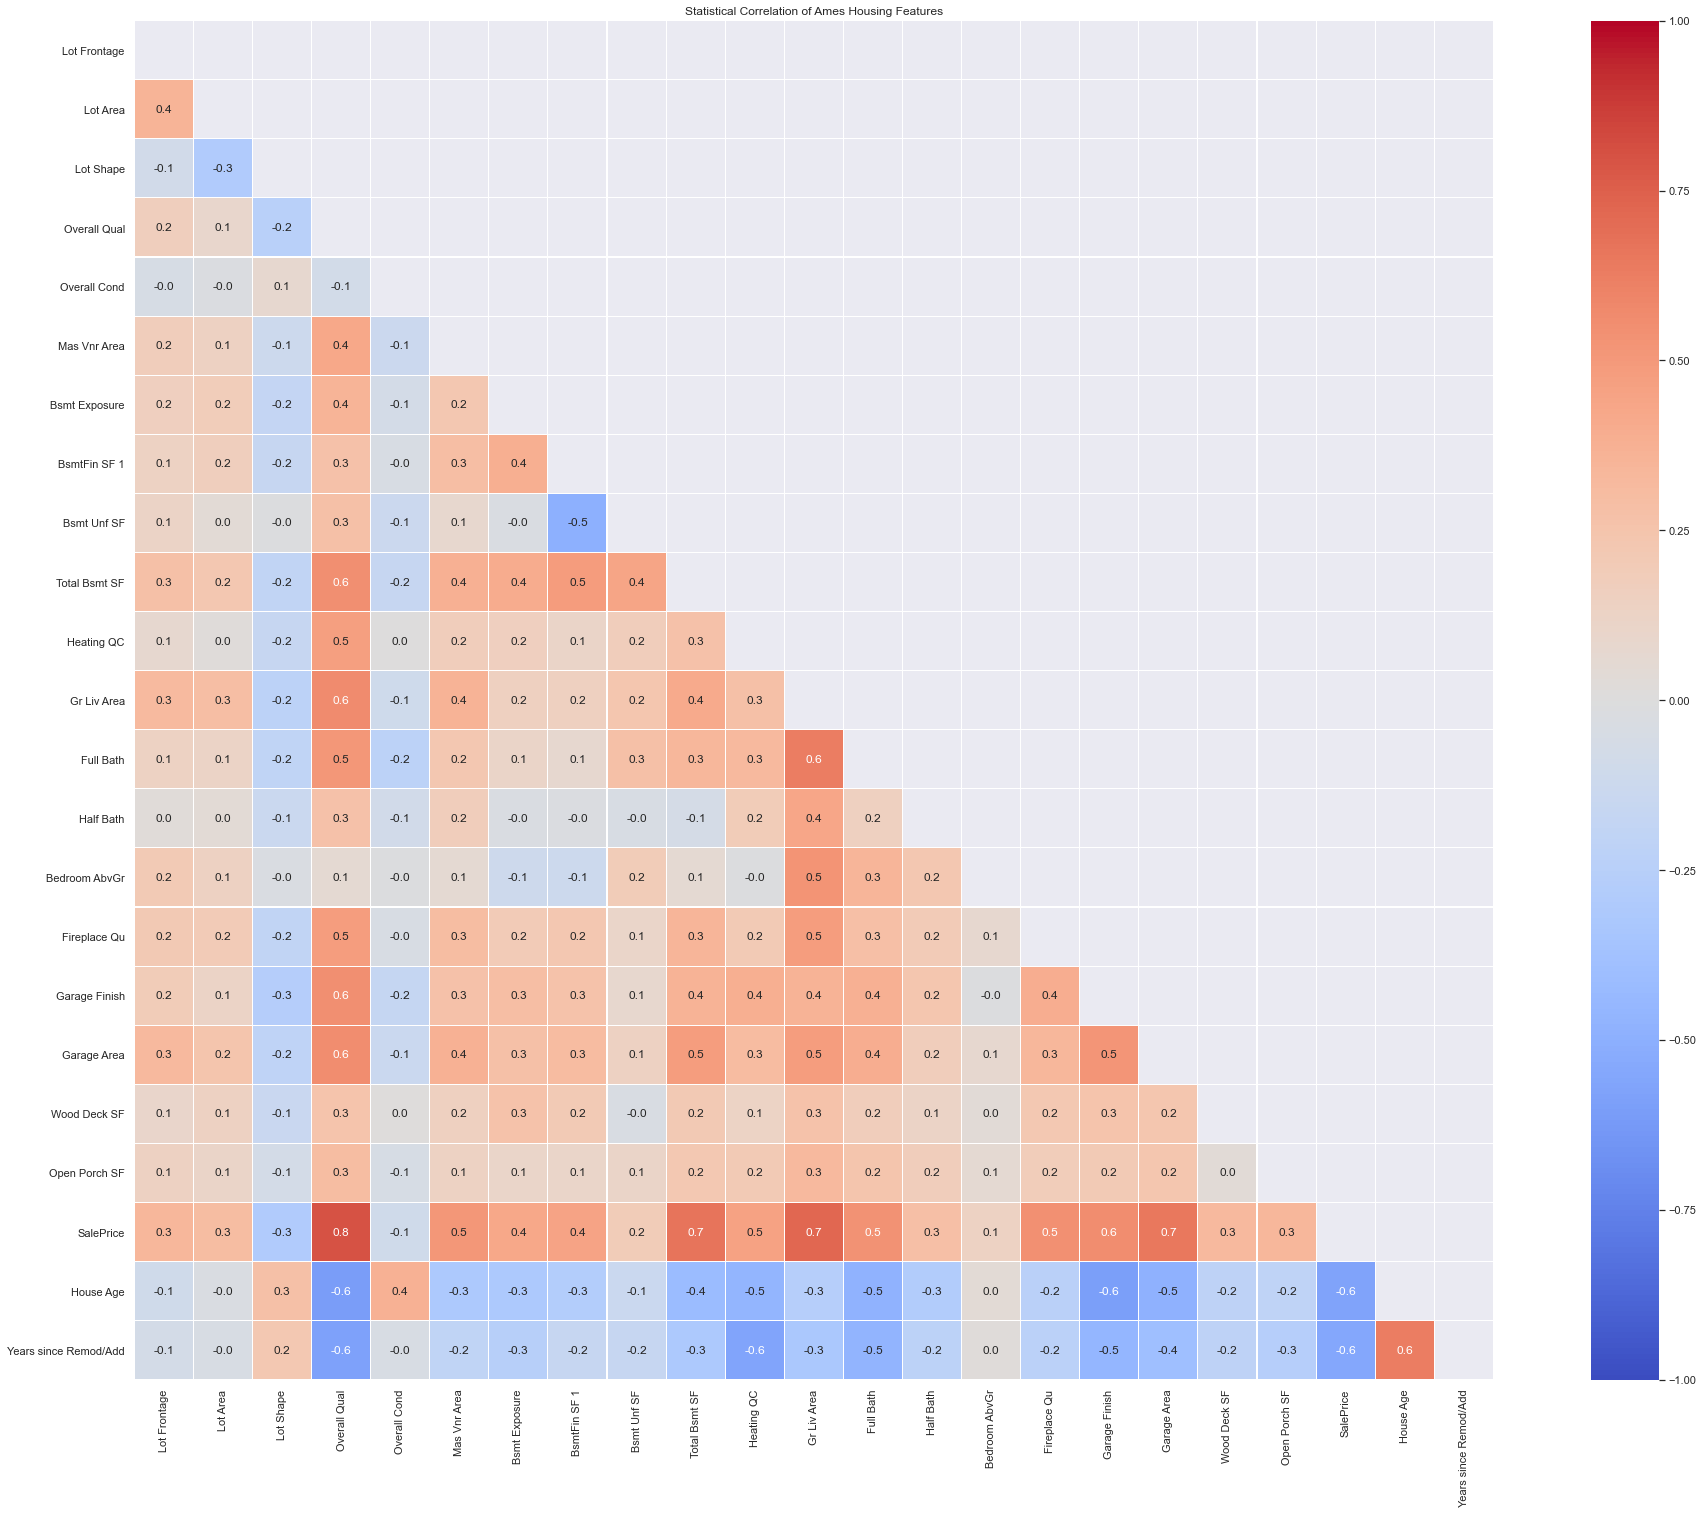

In [132]:
mask = np.triu(ames_train.corr())
plt.figure(figsize=(35,25))
ax = plt.axes()
ax.set_title("Statistical Correlation of Ames Housing Features")
sns.heatmap(ames_train.corr(), ax=ax, vmin=-1.0, vmax=1.0, cmap='coolwarm', annot=True, square=True, mask=mask, linewidths=.1, fmt=".1f");

<span style="color:blue">Heatmap of remaining numerical features.</span>

## EDA: Creating Bar Plots for Categorical features

In [133]:
nom_cols = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Sale Type']

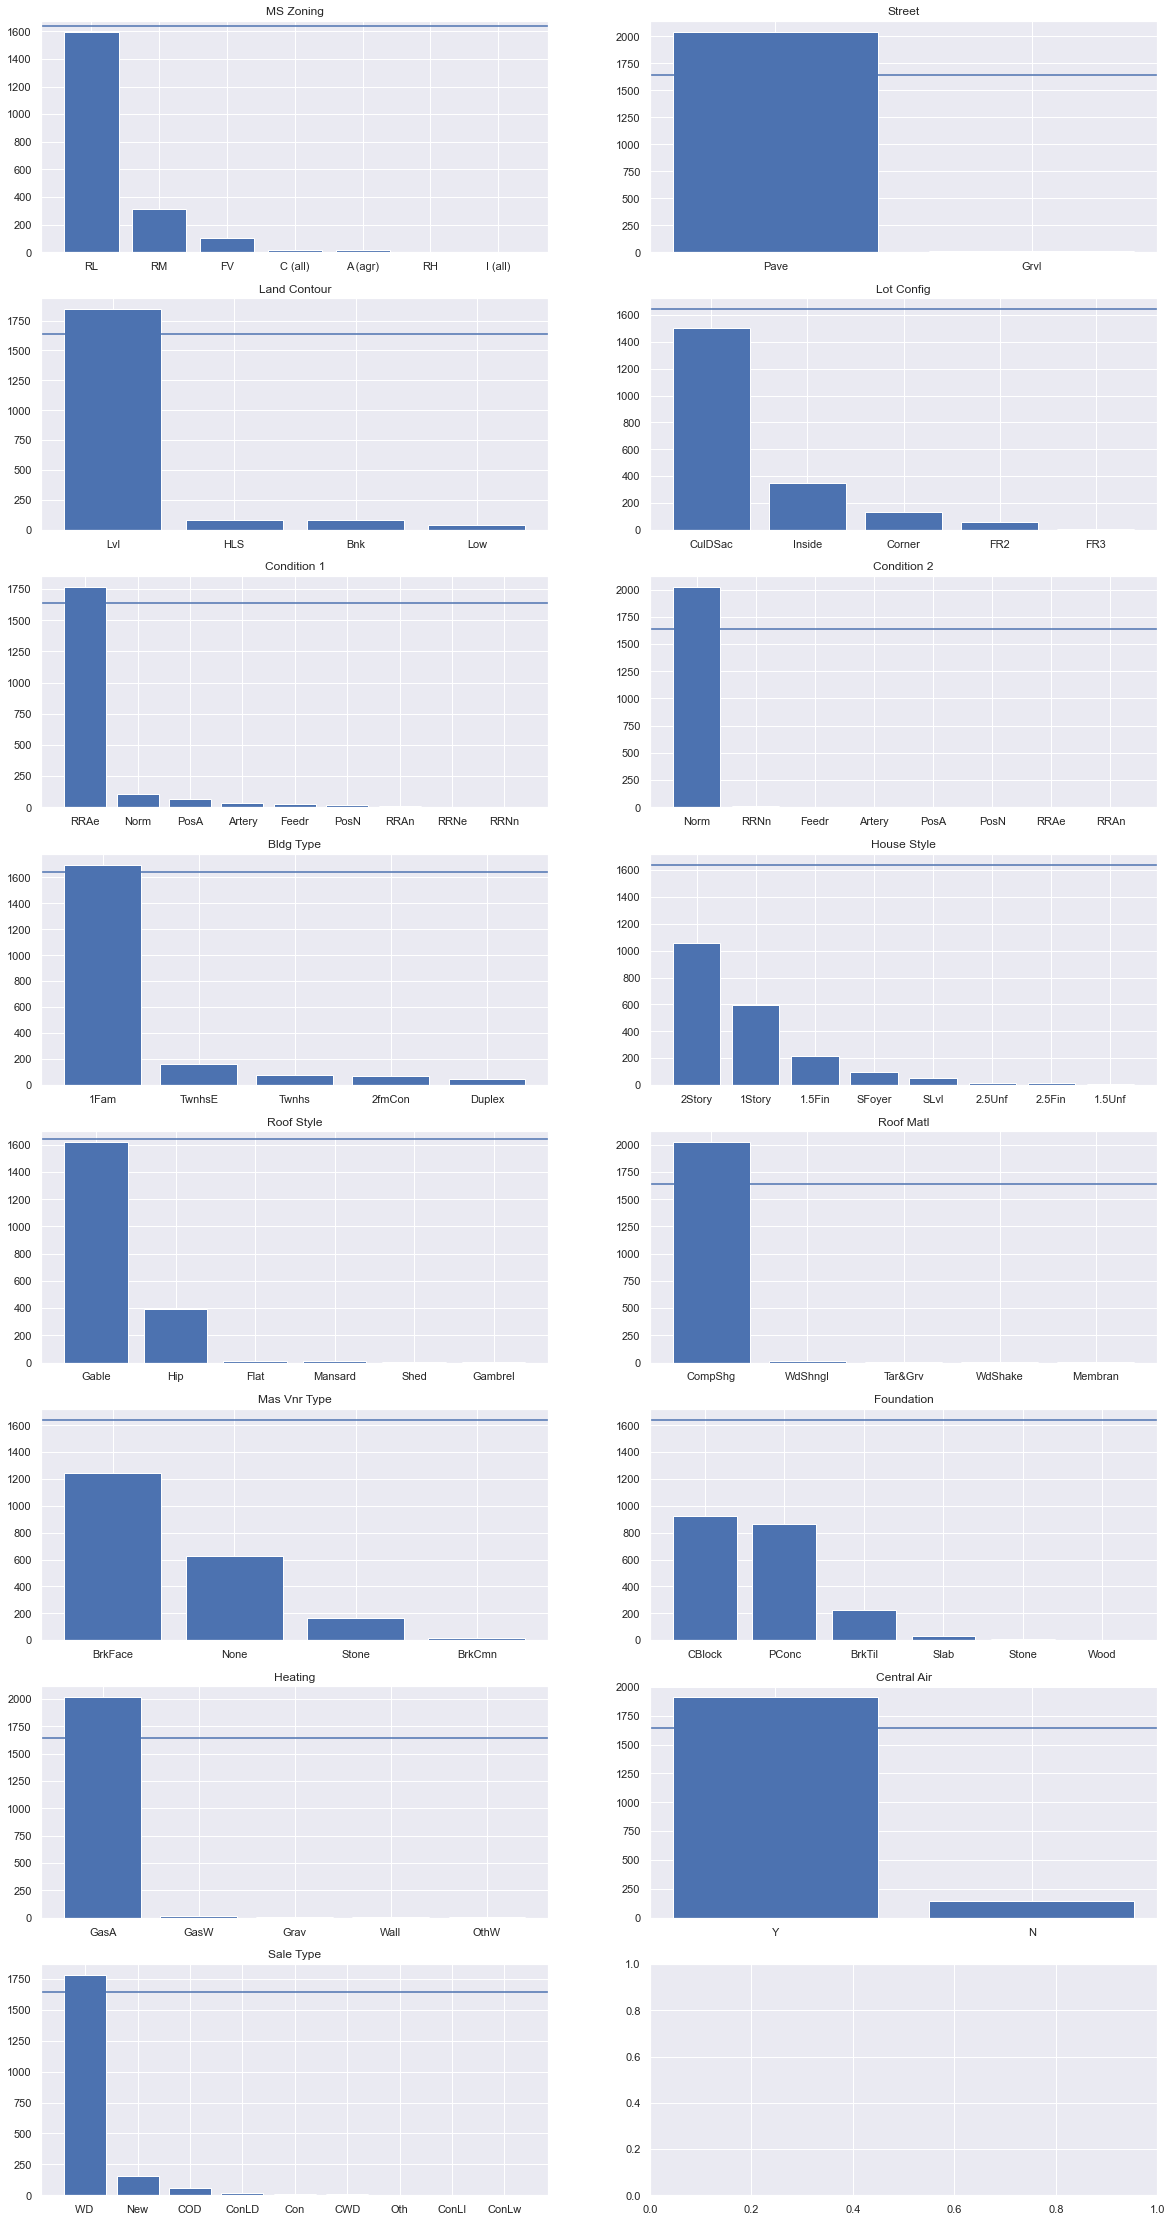

In [134]:
subplot_bares(ames_train, nom_cols)

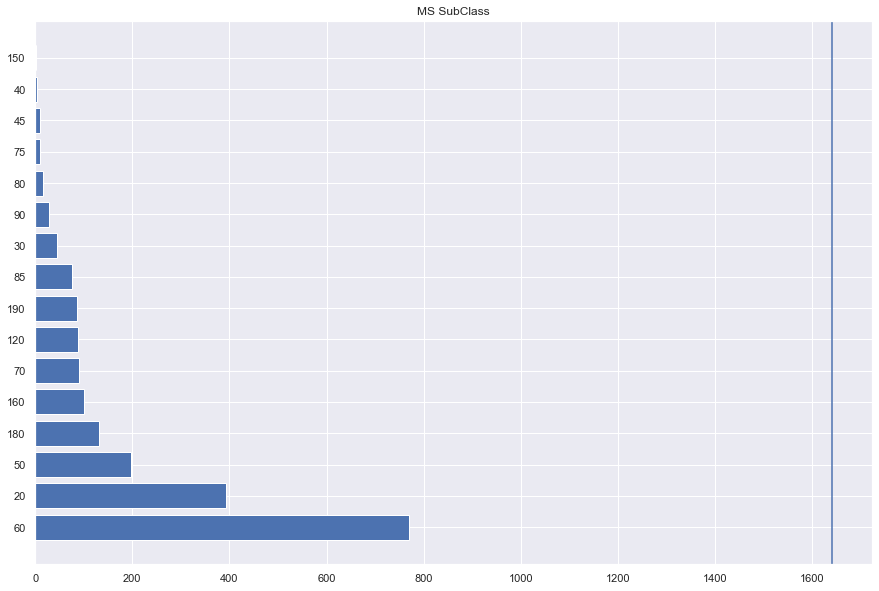

In [135]:
plt.figure(figsize=(15,10))
plt.axvline(x=(2051*0.8))
plt.title('MS SubClass')
plt.barh(ames_train['MS SubClass'].unique(),ames_train['MS SubClass'].value_counts());

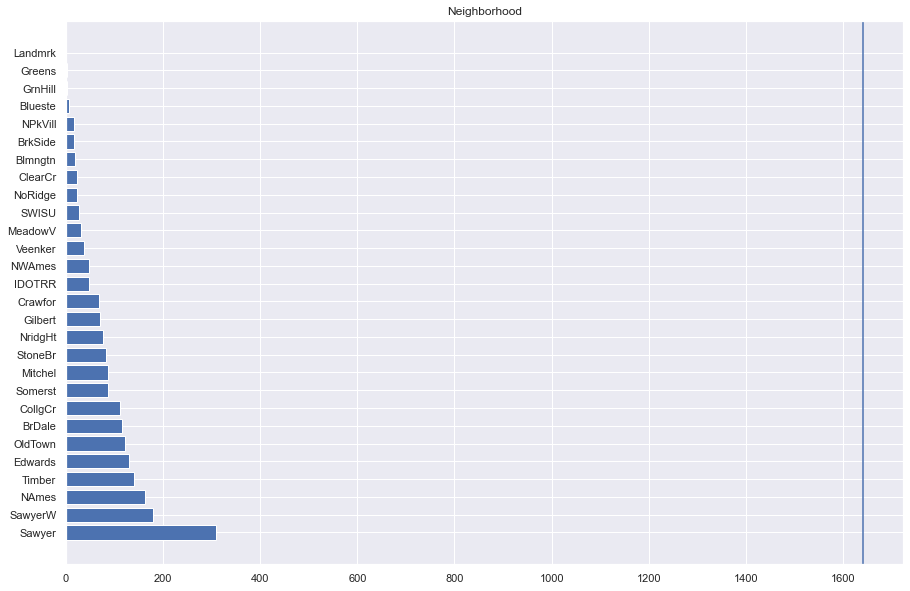

In [136]:
plt.figure(figsize=(15,10))
plt.axvline(x=(2051*0.8))
plt.title('Neighborhood')
plt.barh(ames_train['Neighborhood'].unique(),ames_train['Neighborhood'].value_counts());

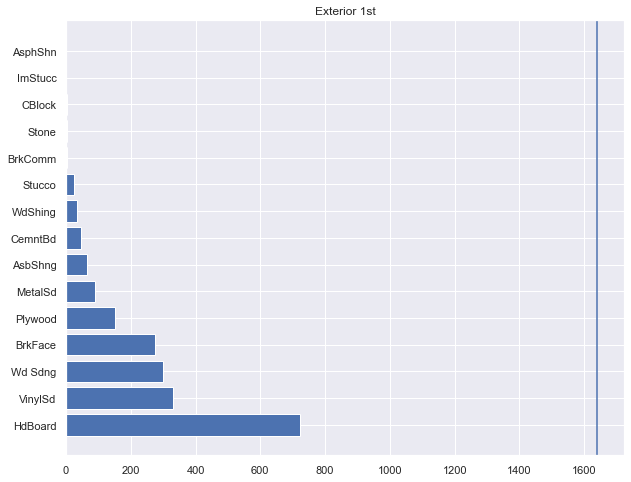

In [137]:
plt.figure(figsize=(10,8))
plt.axvline(x=(2051*0.8))
plt.title('Exterior 1st')
plt.barh(ames_train['Exterior 1st'].unique(),ames_train['Exterior 1st'].value_counts());

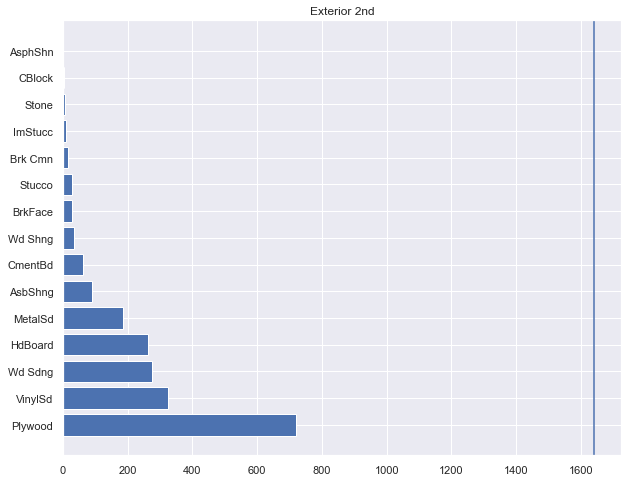

In [138]:
plt.figure(figsize=(10,8))
plt.axvline(x=(2051*0.8))
plt.title('Exterior 2nd')
plt.barh(ames_train['Exterior 2nd'].unique(),ames_train['Exterior 2nd'].value_counts());

<span style="color:blue">The following features were observed to have a large number of same values in one particular category: Street, Land Contour, Condition 1, Condition 2, Bldg Type, Roof Matl, Heating, Central Air, Sale Type</span>

## EDA: Creating Box Plots for Categorical features

In [139]:
def subplot_boxes(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(figsize=(20, 40), nrows=nrows, ncols=2)
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x=column, y='SalePrice', data=dataframe, ax=ax[i])

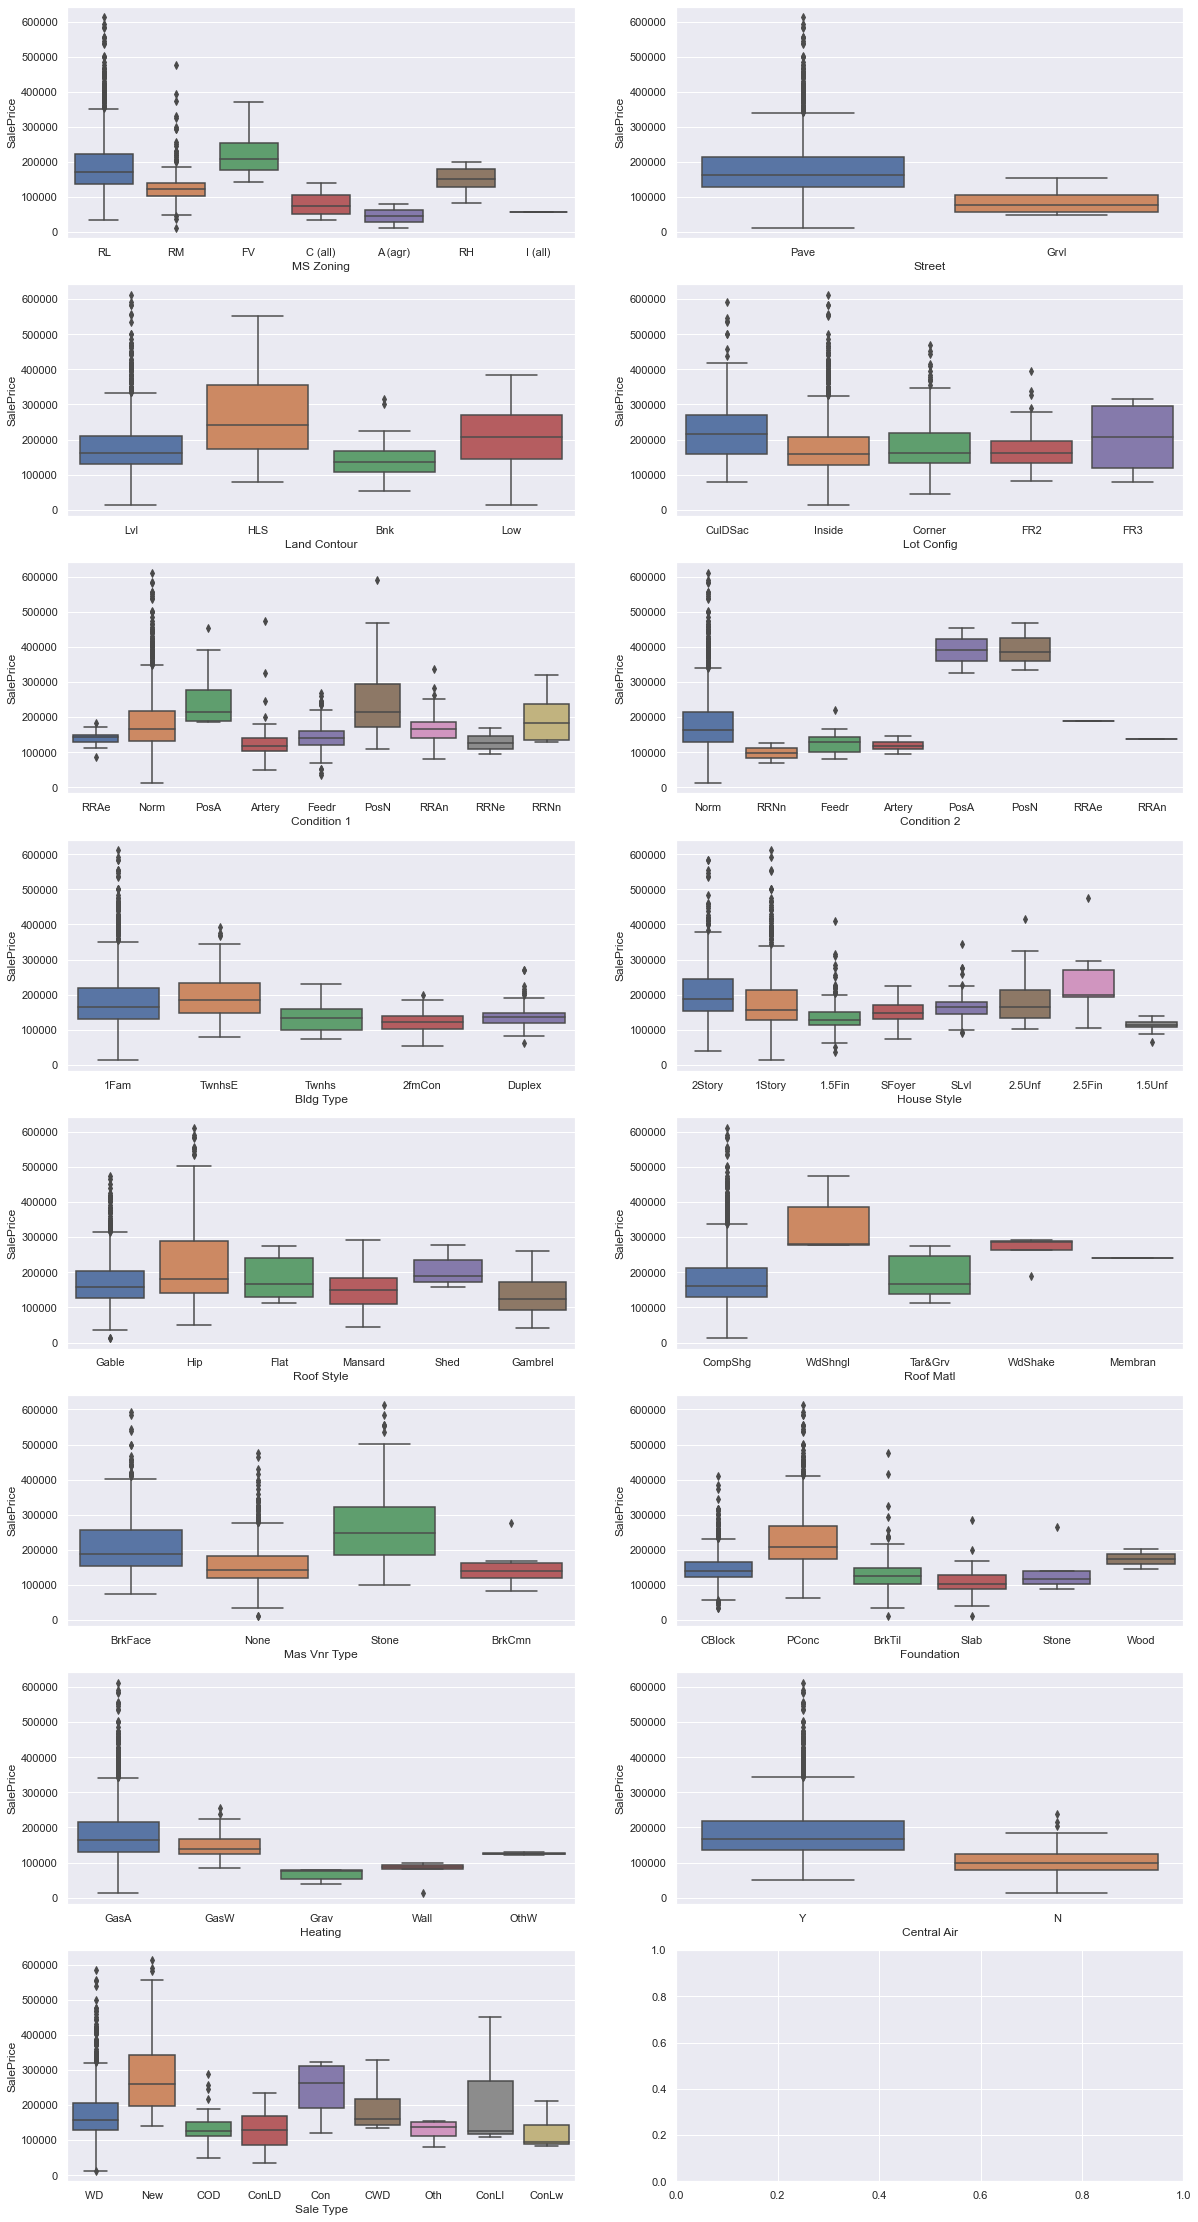

In [140]:
subplot_boxes(ames_train, nom_cols)

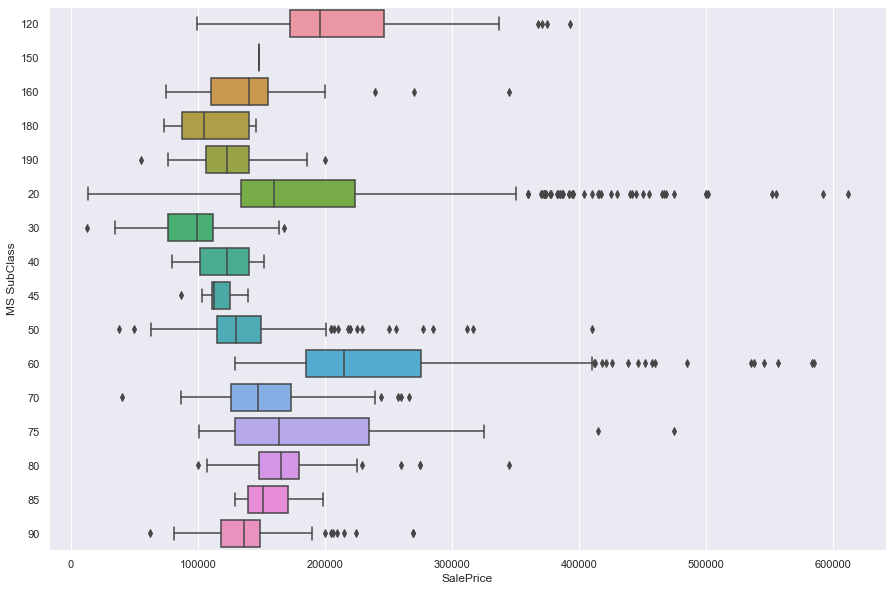

In [141]:
plt.figure(figsize=(15,10))
sns.boxplot(y='MS SubClass', x='SalePrice', data=ames_train, orient='h');

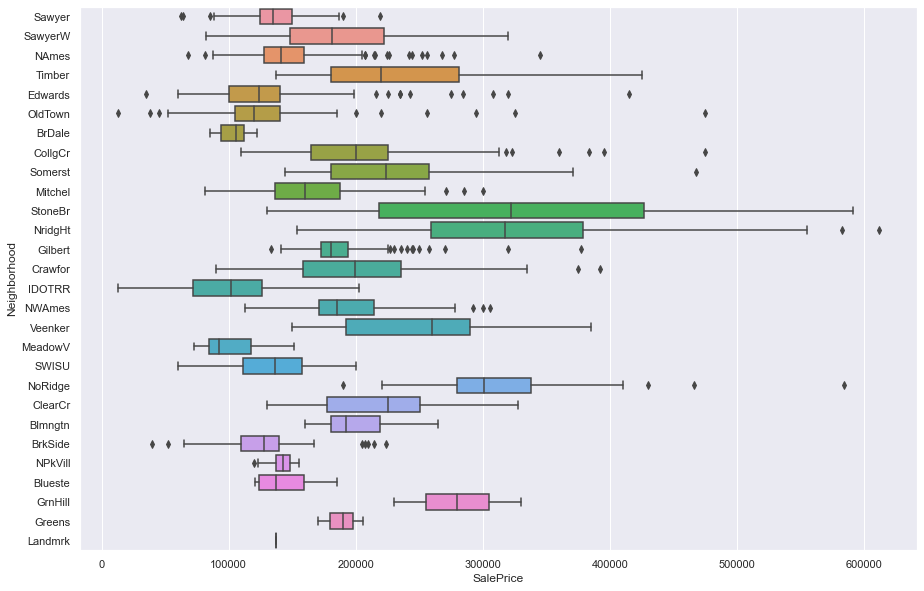

In [142]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Neighborhood', x='SalePrice', data=ames_train, orient='h');

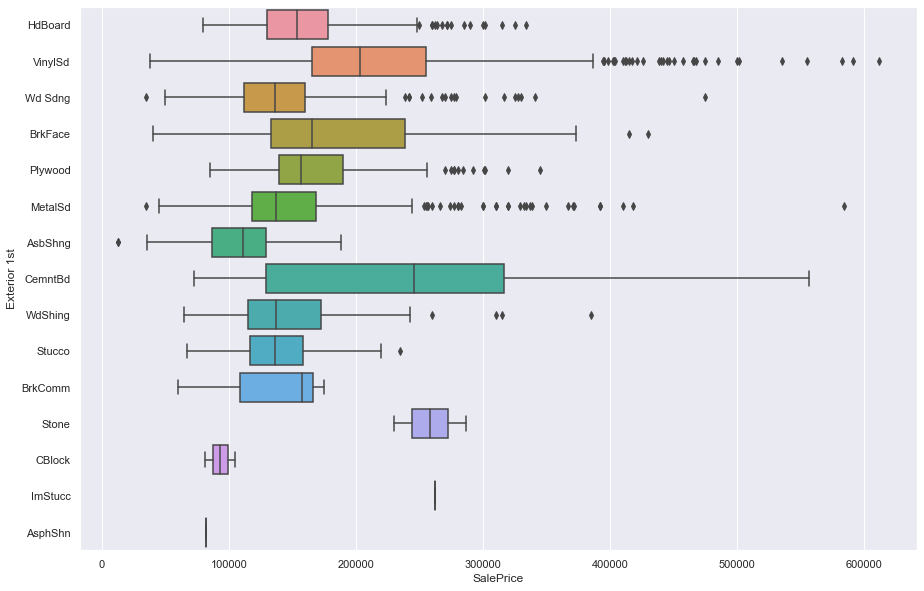

In [143]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Exterior 1st', x='SalePrice', data=ames_train, orient='h');

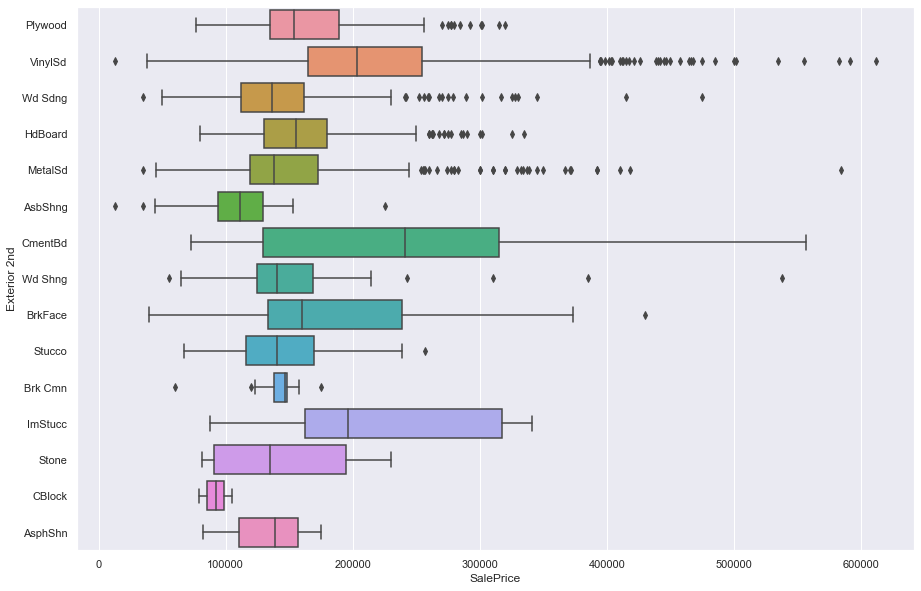

In [144]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Exterior 2nd', x='SalePrice', data=ames_train, orient='h');

<span style="color:blue">The following features were observed to have a little variance and/or a large number of outliers concentrated on one category: Street, Land Contour, Condition 1, Condition 2, Bldg Type, Roof Matl, Heating, Central Air, Sale Type.<br>These match the features observed in the bar plots to have a large number of same values in the same category and are thus selected for dropping.</span>

## 4th Dropping of Features based on the plots for categorical features

In [145]:
def fourth_drop(ames_train):
    
    ames_train.drop('Street', axis=1, inplace=True)
    
    ames_train.drop('Land Contour', axis=1, inplace=True)
    
    ames_train.drop('Condition 1', axis=1, inplace=True)
    
    ames_train.drop('Condition 2', axis=1, inplace=True)
    
    ames_train.drop('Bldg Type', axis=1, inplace=True)
    
    ames_train.drop('Roof Matl', axis=1, inplace=True)
    
    ames_train.drop('Heating', axis=1, inplace=True)
    
    ames_train.drop('Central Air', axis=1, inplace=True)
    
    ames_train.drop('Sale Type', axis=1, inplace=True)

In [146]:
fourth_drop(ames_train)

In [147]:
ames_train = pd.get_dummies(ames_train)

<span style="color:blue">Create dummy variables for all nominal features.</span>

In [148]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Columns: 140 entries, Lot Frontage to Garage Type_NA
dtypes: float64(6), int64(17), uint8(117)
memory usage: 602.4 KB


## Standardizing Test Dataset

In [149]:
ames_test['MS SubClass'] = ames_test['MS SubClass'].map(lambda row: str(row))

In [150]:
ordinal_encoding(ames_test);

In [151]:
filling(ames_test);

In [152]:
first_drop(ames_test);

In [153]:
interaction_terms(ames_test);

In [154]:
second_drop(ames_test);

In [155]:
third_drop(ames_test);

In [156]:
fourth_drop(ames_test);

In [157]:
ames_test = pd.get_dummies(ames_test)

In [158]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 135 entries, Lot Frontage to Garage Type_NA
dtypes: float64(2), int64(20), uint8(113)
memory usage: 248.2 KB


In [159]:
(ames_test.columns).difference(ames_train.columns)

Index(['Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast',
       'Mas Vnr Type_CBlock'],
      dtype='object')

<span style="color:blue">These features do not exist in the train dataset and will be dropped from the test dataset.</span>

In [160]:
def test_drop(ames_test):
    
    ames_test.drop('Exterior 1st_PreCast', axis=1, inplace=True)
    
    ames_test.drop('Exterior 2nd_Other', axis=1, inplace=True)
    
    ames_test.drop('Exterior 2nd_PreCast', axis=1, inplace=True)
    
    ames_test.drop('Mas Vnr Type_CBlock', axis=1, inplace=True)

In [161]:
test_drop(ames_test);

In [162]:
(ames_train.columns).difference(ames_test.columns)

Index(['Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone',
       'Exterior 2nd_Stone', 'MS SubClass_150', 'MS Zoning_A (agr)',
       'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'],
      dtype='object')

<span style="color:blue">These features do not exist in the test dataset and will be created as a column of zeros.</span>

In [163]:
ames_test['Exterior 1st_CBlock'] = np.zeros((879,1))

ames_test['Exterior 1st_ImStucc'] = np.zeros((879,1))

ames_test['Exterior 1st_Stone'] = np.zeros((879,1))

ames_test['Exterior 2nd_Stone'] = np.zeros((879,1))

ames_test['MS SubClass_150'] = np.zeros((879,1))

ames_test['MS Zoning_A (agr)'] = np.zeros((879,1))

ames_test['Neighborhood_GrnHill'] = np.zeros((879,1))

ames_test['Neighborhood_Landmrk'] = np.zeros((879,1))

In [164]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Columns: 139 entries, Lot Frontage to Neighborhood_Landmrk
dtypes: float64(10), int64(20), uint8(109)
memory usage: 299.7 KB


In [165]:
%store ames_train
%store ames_test

Stored 'ames_train' (DataFrame)
Stored 'ames_test' (DataFrame)


<span style="color:blue">Making both dataframes available in another Jupyter Notebook</span>